<a href="https://colab.research.google.com/github/newmantic/MCMC/blob/main/MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def target_distribution(x):
    """
    Define the target distribution we want to sample from.
    This could be any probability distribution, here we use a simple Gaussian.
    :param x: The point at which the distribution is evaluated.
    :return: The value of the target distribution at point x.
    """
    return np.exp(-0.5 * x**2)

def metropolis_hastings(target_dist, num_samples, proposal_std, initial_value):
    """
    Perform the Metropolis-Hastings algorithm to sample from a target distribution.

    :param target_dist: The target distribution to sample from (a function).
    :param num_samples: The number of samples to generate.
    :param proposal_std: The standard deviation of the proposal distribution (Gaussian).
    :param initial_value: The initial value to start the Markov Chain.
    :return: A list of samples generated from the target distribution.
    """
    samples = [initial_value]
    current_value = initial_value

    for _ in range(num_samples):
        # Propose a new value using a normal distribution centered at the current value
        proposed_value = np.random.normal(current_value, proposal_std)

        # Calculate acceptance ratio
        acceptance_ratio = target_dist(proposed_value) / target_dist(current_value)

        # Accept or reject the new sample
        if np.random.rand() < acceptance_ratio:
            current_value = proposed_value

        samples.append(current_value)

    return np.array(samples)

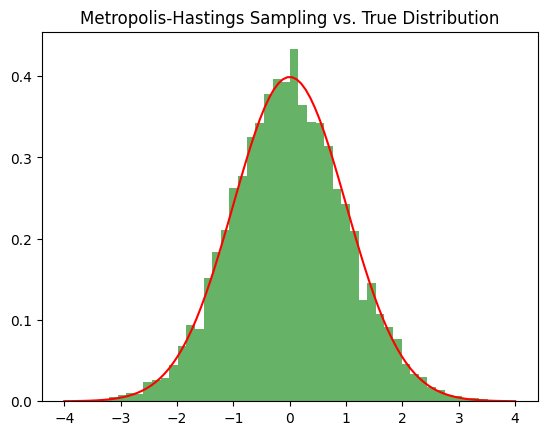

In [2]:
def test_case_1():
    num_samples = 10000
    proposal_std = 1.0
    initial_value = 0.0

    samples = metropolis_hastings(target_distribution, num_samples, proposal_std, initial_value)

    # Compare with true normal distribution
    import matplotlib.pyplot as plt
    plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

    # Plot the true distribution
    x = np.linspace(-4, 4, 100)
    plt.plot(x, (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2), color='red')
    plt.title("Metropolis-Hastings Sampling vs. True Distribution")
    plt.show()

test_case_1()

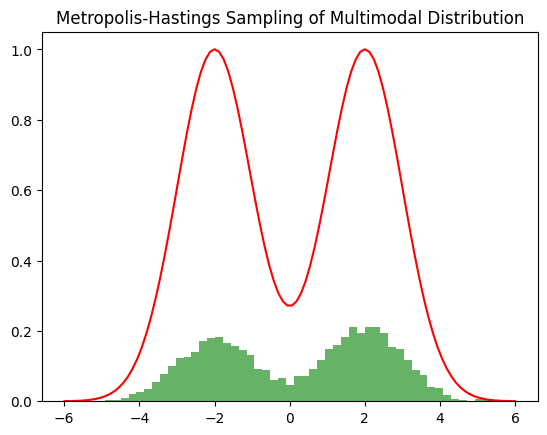

In [3]:
def multimodal_target_distribution(x):
    """
    Define a multimodal target distribution.
    :param x: The point at which the distribution is evaluated.
    :return: The value of the multimodal target distribution at point x.
    """
    return np.exp(-0.5 * (x - 2)**2) + np.exp(-0.5 * (x + 2)**2)

def test_case_2():
    num_samples = 10000
    proposal_std = 1.0
    initial_value = 0.0

    samples = metropolis_hastings(multimodal_target_distribution, num_samples, proposal_std, initial_value)

    # Compare with true multimodal distribution
    import matplotlib.pyplot as plt
    plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

    # Plot the true distribution
    x = np.linspace(-6, 6, 100)
    plt.plot(x, np.exp(-0.5*(x-2)**2) + np.exp(-0.5*(x+2)**2), color='red')
    plt.title("Metropolis-Hastings Sampling of Multimodal Distribution")
    plt.show()

test_case_2()

In [4]:
def high_dimensional_target_distribution(x):
    """
    Define a high-dimensional Gaussian distribution.
    :param x: The point (vector) at which the distribution is evaluated.
    :return: The value of the high-dimensional Gaussian distribution at point x.
    """
    return np.exp(-0.5 * np.dot(x, x))

def test_case_3():
    dim = 5  # 5-dimensional space
    num_samples = 10000
    proposal_std = 1.0
    initial_value = np.zeros(dim)

    samples = metropolis_hastings(high_dimensional_target_distribution, num_samples, proposal_std, initial_value)

    # Compute and print the sample mean and covariance to compare with the true Gaussian distribution
    sample_mean = np.mean(samples, axis=0)
    sample_covariance = np.cov(samples, rowvar=False)

    print("Sample Mean:\n", sample_mean)
    print("Sample Covariance:\n", sample_covariance)

test_case_3()

Sample Mean:
 [-0.00983126  0.01780921 -0.00871241 -0.01617566 -0.04917481]
Sample Covariance:
 [[ 0.94444454  0.06190378  0.03417712 -0.02541903  0.06806398]
 [ 0.06190378  0.9800503   0.02869728 -0.03535891 -0.02200744]
 [ 0.03417712  0.02869728  1.00606763  0.01687898 -0.03453708]
 [-0.02541903 -0.03535891  0.01687898  0.9396903  -0.03660755]
 [ 0.06806398 -0.02200744 -0.03453708 -0.03660755  0.96114146]]


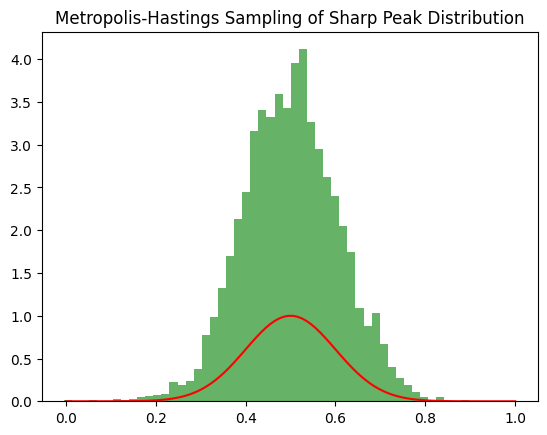

In [5]:
def sharp_peak_target_distribution(x):
    """
    Define a distribution with a sharp peak.
    :param x: The point at which the distribution is evaluated.
    :return: The value of the sharp peak distribution at point x.
    """
    return np.exp(-0.5 * (x - 0.5)**2 * 100)

def test_case_4():
    num_samples = 10000
    proposal_std = 0.1  # Smaller proposal standard deviation due to the sharp peak
    initial_value = 0.0

    samples = metropolis_hastings(sharp_peak_target_distribution, num_samples, proposal_std, initial_value)

    # Plot the results
    import matplotlib.pyplot as plt
    plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

    # Plot the true distribution
    x = np.linspace(0, 1, 100)
    plt.plot(x, np.exp(-0.5 * (x - 0.5)**2 * 100), color='red')
    plt.title("Metropolis-Hastings Sampling of Sharp Peak Distribution")
    plt.show()

test_case_4()